In [1]:
import pandas as pd # Importing pandas library for data analysis
import numpy as np  # Importing numpy library for numerical computing
import seaborn as sns # Importing seaborn library for data visualization
import matplotlib
import matplotlib.pyplot as plt # Importing matplotlib library for data visualization

sns.set_context('notebook') # Setting the seaborn context for notebook style plots
sns.set_style('whitegrid') # Setting the seaborn style to whitegrid
sns.set_palette('Spectral') # Setting the seaborn color palette to Spectral

import warnings # Importing the warnings library to ignore any warning messages during analysis
warnings.filterwarnings('ignore')

# Finance related operations
from pandas_datareader import data

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data5 = pd.concat([pd.read_csv("2014_Financial_Data.csv"),
                    pd.read_csv("2015_Financial_Data.csv"),
                    pd.read_csv("2016_Financial_Data.csv"),
                    pd.read_csv("2017_Financial_Data.csv"),
                    pd.read_csv("2018_Financial_Data.csv"),],sort=False).drop_duplicates().sample(frac=1)
data5 = data5.rename(columns={'Unnamed: 0': 'Ticker'})
print(data5.shape)
data5.head()

(22077, 229)


,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
1298,CBAY,0.000000e+00,-1.0000,0.000000e+00,0.000000e+00,58124000.0,14381000.0,72505000.0,-7.250500e+07,336000.0,...,-1.0000,2.0692,0.1610,Healthcare,NaN,0,NaN,NaN,NaN,-76.271187
197,WVVI,2.085353e+07,0.0735,7.971676e+06,1.288185e+07,0.0,9245807.0,9245807.0,3.636044e+06,473608.0,...,0.7654,0.0000,0.1481,Consumer Defensive,NaN,0,NaN,NaN,-16.484850,NaN
3813,JRJC,4.262265e+07,-0.4868,2.193368e+07,2.068897e+07,16208000.0,44717679.0,61217496.0,-4.052852e+07,3204.0,...,0.0000,0.1189,-0.3604,Financial Services,NaN,0,NaN,NaN,-67.857143,NaN
448,CC,6.638000e+09,0.0736,4.667000e+09,1.971000e+09,82000000.0,657000000.0,788000000.0,1.183000e+09,195000000.0,...,-0.0340,0.0123,0.0495,Basic Materials,NaN,0,NaN,NaN,NaN,-35.066465
1744,AQMS,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2280000.0,3171000.0,5451000.0,-5.451000e+06,1128000.0,...,NaN,NaN,NaN,Industrials,NaN,1,153.578326,NaN,NaN,NaN


In [4]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 1298 to 3759
Columns: 229 entries, Ticker to 2019 PRICE VAR [%]
dtypes: float64(226), int64(1), object(2)
memory usage: 38.7+ MB


In [5]:
# Tetapkan kolom 'Ticker' sebagai indeks DataFrame
# data5 = data5.set_index('Unnamed: 0')

# Ubah kolom 'Sector' menjadi variabel kategori dengan menggantinya dengan kode numerik yang sesuai
# data5['Sector'] = data5['Sector'].astype('category').cat.codes

# Gantikan nilai NaN dengan 0
data5.fillna(0, inplace=True)



In [6]:
# Assuming data5 is the concatenated DataFrame
data_filled = data5.replace(0, np.nan)  # Replace 0 with NaN temporarily

# Calculate the percentage of non-zero values for each company
data_filled['non_zero_percentage'] = data_filled.apply(lambda x: x.count() / len(x) * 100, axis=1)

# Calculate the quartiles for non_zero_percentage
q1 = data_filled['non_zero_percentage'].quantile(0.25)
q2 = data_filled['non_zero_percentage'].quantile(0.5)
q3 = data_filled['non_zero_percentage'].quantile(0.75)

print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)

# Set the threshold for retaining or removing companies
threshold = q1  # Example: You may choose Q1 as the threshold

# Filter the dataset based on the threshold
data_cleaned = data_filled[data_filled['non_zero_percentage'] >= threshold]

# Replace NaN back to 0
data_cleaned = data_cleaned.fillna(0)

Q1: 68.5589519650655
Q2 (Median): 77.72925764192141
Q3: 84.71615720524017


In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 197 to 3759
Columns: 230 entries, Ticker to non_zero_percentage
dtypes: float64(228), object(2)
memory usage: 29.3+ MB


In [8]:
average_indicators_filled = 229 * 0.7772925764192141
print(average_indicators_filled)


178.00000000000003


In [9]:
data_cleaned.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],non_zero_percentage
197,WVVI,2.085353e+07,0.0735,7.971676e+06,1.288185e+07,0.0,9.245807e+06,9.245807e+06,3.636044e+06,4.736080e+05,...,0.0000,0.1481,Consumer Defensive,0.0,0.0,0.0,0.000000,-16.484850,0.000000,83.842795
448,CC,6.638000e+09,0.0736,4.667000e+09,1.971000e+09,82000000.0,6.570000e+08,7.880000e+08,1.183000e+09,1.950000e+08,...,0.0123,0.0495,Basic Materials,0.0,0.0,0.0,0.000000,0.000000,-35.066465,88.209607
301,VEDL,9.647191e+09,-0.1769,1.321138e+10,-3.564190e+09,0.0,5.633599e+08,4.911749e+08,-4.055364e+09,8.988656e+08,...,0.0000,-0.1530,Basic Materials,0.0,1.0,0.0,73.714824,0.000000,0.000000,76.855895
1858,AJRD,1.761300e+09,0.0310,1.477400e+09,2.839000e+08,0.0,3.470000e+07,1.011000e+08,1.828000e+08,3.250000e+07,...,-1.0000,-0.2918,Industrials,0.0,1.0,0.0,69.473118,0.000000,0.000000,83.842795
3214,OFG,2.697200e+08,-0.1044,0.000000e+00,2.697200e+08,0.0,1.737730e+08,2.016310e+08,6.808900e+07,0.000000e+00,...,0.0000,0.0258,Financial Services,0.0,1.0,0.0,0.000000,87.253657,0.000000,72.925764


In [10]:
data_cleaned.drop('Class', axis=1, inplace=True)
data_cleaned

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],non_zero_percentage
197,WVVI,2.085353e+07,0.0735,7.971676e+06,1.288185e+07,0.0,9.245807e+06,9.245807e+06,3.636044e+06,4.736080e+05,...,0.7654,0.0000,0.1481,Consumer Defensive,0.000000,0.00000,0.000000,-16.484850,0.000000,83.842795
448,CC,6.638000e+09,0.0736,4.667000e+09,1.971000e+09,82000000.0,6.570000e+08,7.880000e+08,1.183000e+09,1.950000e+08,...,-0.0340,0.0123,0.0495,Basic Materials,0.000000,0.00000,0.000000,0.000000,-35.066465,88.209607
301,VEDL,9.647191e+09,-0.1769,1.321138e+10,-3.564190e+09,0.0,5.633599e+08,4.911749e+08,-4.055364e+09,8.988656e+08,...,-0.0535,0.0000,-0.1530,Basic Materials,0.000000,0.00000,73.714824,0.000000,0.000000,76.855895
1858,AJRD,1.761300e+09,0.0310,1.477400e+09,2.839000e+08,0.0,3.470000e+07,1.011000e+08,1.828000e+08,3.250000e+07,...,0.0362,-1.0000,-0.2918,Industrials,0.000000,0.00000,69.473118,0.000000,0.000000,83.842795
3214,OFG,2.697200e+08,-0.1044,0.000000e+00,2.697200e+08,0.0,1.737730e+08,2.016310e+08,6.808900e+07,0.000000e+00,...,-0.5867,0.0000,0.0258,Financial Services,0.000000,0.00000,0.000000,87.253657,0.000000,72.925764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,THS,6.175100e+09,0.9259,5.049000e+09,1.126100e+09,0.0,7.448000e+08,1.221600e+09,-9.550000e+07,1.192000e+08,...,1.2571,0.0000,1.1765,Consumer Defensive,0.000000,0.00000,-31.976345,0.000000,0.000000,80.786026
2154,PAM,9.035191e+08,-0.1623,4.293981e+08,4.741210e+08,0.0,7.232133e+07,9.594963e+07,3.781713e+08,3.989653e+08,...,0.5216,0.0000,-0.1319,Utilities,0.000000,0.00000,0.000000,0.000000,-50.660659,80.349345
1512,DVD,4.653900e+07,0.0189,2.781800e+07,1.872100e+07,0.0,7.414000e+06,9.794000e+06,8.927000e+06,3.230000e+05,...,-0.4517,0.0000,0.0375,Consumer Cyclical,0.000000,2.17391,0.000000,0.000000,0.000000,87.772926
3103,AINV,3.797450e+08,-0.1243,9.044400e+07,2.893010e+08,0.0,1.519400e+07,1.519400e+07,2.741070e+08,8.085000e+07,...,-0.1240,0.0000,-0.0129,Financial Services,0.000000,0.00000,5.076254,0.000000,0.000000,68.995633


In [11]:
data_cleaned.sort_values('Ticker', ascending=True)


,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],non_zero_percentage
557,A,4.914000e+09,0.0988,2.227000e+09,2.687000e+09,385000000.0,1.374000e+09,1.759000e+09,928000000.0,75000000.0,...,-0.1054,0.1357,0.1180,Healthcare,0.000000,0.000000,0.000000,0.000000,30.976102,93.013100
492,A,4.038000e+09,-0.0025,1.997000e+09,2.041000e+09,330000000.0,1.189000e+09,1.519000e+09,522000000.0,66000000.0,...,-0.0048,-0.0782,-0.0083,Healthcare,0.000000,13.194947,0.000000,0.000000,0.000000,92.139738
524,A,4.202000e+09,0.0406,2.005000e+09,2.197000e+09,329000000.0,1.253000e+09,1.582000e+09,615000000.0,72000000.0,...,0.1505,-0.0030,0.0538,Healthcare,0.000000,0.000000,45.350940,0.000000,0.000000,92.139738
460,A,4.048000e+09,0.0395,2.072000e+09,1.976000e+09,358000000.0,1.199000e+09,1.557000e+09,419000000.0,110000000.0,...,-0.3838,0.0623,0.0127,Healthcare,4.179246,0.000000,0.000000,0.000000,0.000000,92.139738
536,A,4.472000e+09,0.0643,2.063000e+09,2.409000e+09,339000000.0,1.229000e+09,1.568000e+09,841000000.0,79000000.0,...,0.0562,0.0304,-0.0192,Healthcare,0.000000,0.000000,0.000000,0.717881,0.000000,93.449782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,ZUMZ,9.274010e+08,0.1090,6.175270e+08,3.098740e+08,0.0,2.611140e+08,2.611140e+08,48760000.0,0.0,...,0.0000,0.0000,0.1099,Consumer Cyclical,0.000000,0.000000,0.000000,0.000000,76.044849,80.349345
1211,ZUMZ,7.243370e+08,0.0821,4.625770e+08,2.617600e+08,0.0,1.889180e+08,1.889180e+08,72842000.0,0.0,...,-0.3227,0.0000,0.0936,Consumer Cyclical,-60.429206,0.000000,0.000000,0.000000,0.000000,83.842795
1156,ZYME,1.100900e+07,0.1396,0.000000e+00,1.100900e+07,36816000.0,1.255400e+07,4.887300e+07,-37864000.0,950000.0,...,0.0000,0.4933,1.4064,Healthcare,0.000000,0.000000,-41.592308,0.000000,0.000000,68.558952
4391,ZYME,5.301900e+07,0.0243,0.000000e+00,5.301900e+07,56684000.0,2.945700e+07,8.614600e+07,-33127000.0,166000.0,...,0.0000,0.3577,0.5880,Healthcare,0.000000,0.000000,0.000000,0.000000,209.462222,70.742358


In [12]:
# Define a function to set the class value based on the stock price gain
def set_class(value):
    if value >= 0:
        return 1
    else:
        return 0

# Iterate through the years and create new class columns
for year in range(2015, 2020):
    price_var_col = f'{year} PRICE VAR [%]'
    class_col = f'Class{year % 2000}'

    # Apply the set_class function to each value in the price_var_col
    data_cleaned[class_col] = data_cleaned[price_var_col].apply(set_class)

# Rearrange columns to put the class columns next to the corresponding price var columns
new_column_order = []
for year in range(2015, 2020):
    new_column_order.append(f'{year} PRICE VAR [%]')
    new_column_order.append(f'Class{year % 2000}')

remaining_columns = [col for col in data_cleaned.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

data_cleaned = data_cleaned[new_column_order]


In [13]:
data_cleaned.head(20)

,2015 PRICE VAR [%],Class15,2016 PRICE VAR [%],Class16,2017 PRICE VAR [%],Class17,2018 PRICE VAR [%],Class18,2019 PRICE VAR [%],Class19,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,non_zero_percentage
197,0.000000,1,0.000000,1,0.000000,1,-16.484850,0,0.000000,1,...,0.0000,-0.0595,0.2358,0.3304,0.2934,0.7654,0.0000,0.1481,Consumer Defensive,83.842795
448,0.000000,1,0.000000,1,0.000000,1,0.000000,1,-35.066465,0,...,0.1314,-0.0631,0.2267,0.0095,0.2760,-0.0340,0.0123,0.0495,Basic Materials,88.209607
301,0.000000,1,0.000000,1,73.714824,1,0.000000,1,0.000000,1,...,0.1006,-0.2785,-0.1253,-0.1835,-0.3081,-0.0535,0.0000,-0.1530,Basic Materials,76.855895
1858,0.000000,1,0.000000,1,69.473118,1,0.000000,1,0.000000,1,...,0.0000,-0.4138,0.1850,0.1106,1.2195,0.0362,-1.0000,-0.2918,Industrials,83.842795
3214,0.000000,1,0.000000,1,0.000000,1,87.253657,1,0.000000,1,...,-0.1096,0.0000,0.0000,-0.0481,0.0267,-0.5867,0.0000,0.0258,Financial Services,72.925764
2886,0.000000,1,0.000000,1,0.000000,1,-7.251041,0,0.000000,1,...,0.0000,0.1835,0.0000,0.3965,0.1363,0.2278,-0.0419,0.0606,Energy,79.475983
2545,0.000000,1,15.498883,1,0.000000,1,0.000000,1,0.000000,1,...,-0.2462,-0.0609,-0.2706,-0.0504,-0.0427,-0.0435,-0.2051,-0.0736,Energy,86.026201
462,6.471921,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1,...,0.0122,-0.1439,0.0267,0.0482,-0.1616,0.0450,0.1572,0.0650,Healthcare,86.899563
396,0.000000,1,15.384614,1,0.000000,1,0.000000,1,0.000000,1,...,0.0000,0.1890,0.3377,0.1045,-0.0718,-0.0920,-0.1071,-0.0306,Basic Materials,86.462882
1045,0.000000,1,0.000000,1,0.000000,1,0.000000,1,0.816241,1,...,0.0000,0.1362,0.5855,0.3389,0.4042,0.0071,0.0535,0.1786,Healthcare,86.462882


In [14]:
# Get the current column order
current_column_order = data_cleaned.columns.tolist()

# Create a list of the 'PRICE VAR [%]' and 'Class' columns to move
columns_to_move = []
for year in range(2015, 2020):
    columns_to_move.append(f'{year} PRICE VAR [%]')
    columns_to_move.append(f'Class{year % 2000}')

# Remove the 'PRICE VAR [%]' and 'Class' columns from the current column order
remaining_columns = [col for col in current_column_order if col not in columns_to_move]

# Create a new column order with the 'PRICE VAR [%]' and 'Class' columns at the rightmost side
new_column_order = remaining_columns + columns_to_move

# Reorder the DataFrame columns based on the new column order
data_cleaned = data_cleaned[new_column_order]

In [15]:
data_cleaned.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,2015 PRICE VAR [%],Class15,2016 PRICE VAR [%],Class16,2017 PRICE VAR [%],Class17,2018 PRICE VAR [%],Class18,2019 PRICE VAR [%],Class19
197,WVVI,2.085353e+07,0.0735,7.971676e+06,1.288185e+07,0.0,9.245807e+06,9.245807e+06,3.636044e+06,4.736080e+05,...,0.0,1,0.0,1,0.000000,1,-16.484850,0,0.000000,1
448,CC,6.638000e+09,0.0736,4.667000e+09,1.971000e+09,82000000.0,6.570000e+08,7.880000e+08,1.183000e+09,1.950000e+08,...,0.0,1,0.0,1,0.000000,1,0.000000,1,-35.066465,0
301,VEDL,9.647191e+09,-0.1769,1.321138e+10,-3.564190e+09,0.0,5.633599e+08,4.911749e+08,-4.055364e+09,8.988656e+08,...,0.0,1,0.0,1,73.714824,1,0.000000,1,0.000000,1
1858,AJRD,1.761300e+09,0.0310,1.477400e+09,2.839000e+08,0.0,3.470000e+07,1.011000e+08,1.828000e+08,3.250000e+07,...,0.0,1,0.0,1,69.473118,1,0.000000,1,0.000000,1
3214,OFG,2.697200e+08,-0.1044,0.000000e+00,2.697200e+08,0.0,1.737730e+08,2.016310e+08,6.808900e+07,0.000000e+00,...,0.0,1,0.0,1,0.000000,1,87.253657,1,0.000000,1


In [65]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 197 to 3759
Columns: 234 entries, Ticker to Class19
dtypes: float64(227), int64(5), object(2)
memory usage: 29.8+ MB


In [66]:
data_selected = data_cleaned

# Replace 0 values with NaN
data_selected.replace(0, np.nan, inplace=True)

# Group by Ticker and calculate the mean of non-NaN values for each year
average_data = data_selected.groupby('Ticker').mean()

# Reset the index to make 'Ticker' a column again
average_data.reset_index(inplace=True)



In [67]:
average_data.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,2015 PRICE VAR [%],Class15,2016 PRICE VAR [%],Class16,2017 PRICE VAR [%],Class17,2018 PRICE VAR [%],Class18,2019 PRICE VAR [%],Class19
0,A,4.334800e+09,0.04814,2.072800e+09,2.262000e+09,348200000.0,1.248800e+09,1.597000e+09,6.650000e+08,80400000.0,...,4.179246,1.0,13.194947,1.0,45.350940,1.0,0.717881,1.0,30.976102,1.0
1,AA,1.139300e+10,0.02115,8.997000e+09,2.396000e+09,41250000.0,3.092500e+08,1.647000e+09,7.490000e+08,184750000.0,...,NaN,1.0,22.046441,1.0,86.853968,1.0,-51.821641,1.0,-18.025913,1.0
2,AAL,4.218900e+10,0.12840,1.863500e+10,2.355400e+10,NaN,1.209240e+10,1.907400e+10,4.480000e+09,973400000.0,...,-20.768098,1.0,15.404948,1.0,13.344850,1.0,-38.817936,1.0,-10.602069,1.0
3,AAME,1.730004e+08,0.02386,1.121842e+08,6.081620e+07,NaN,4.228860e+07,5.544040e+07,5.375800e+06,1671600.0,...,24.445114,1.0,-14.942088,1.0,-16.654341,1.0,-25.389821,1.0,-20.250605,1.0
4,AAN,3.259027e+09,0.11624,2.951072e+08,2.963920e+09,NaN,1.392605e+09,2.730039e+09,2.338810e+08,20584400.0,...,-26.649795,1.0,41.604419,1.0,25.314724,1.0,6.825130,1.0,31.675678,1.0


In [19]:
average_price_gain = average_data[['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']].mean()

In [20]:
average_price_gain.head()

2015 PRICE VAR [%]    44.454396
2016 PRICE VAR [%]    22.996917
2017 PRICE VAR [%]    19.746559
2018 PRICE VAR [%]     0.721682
2019 PRICE VAR [%]     5.139523
dtype: float64

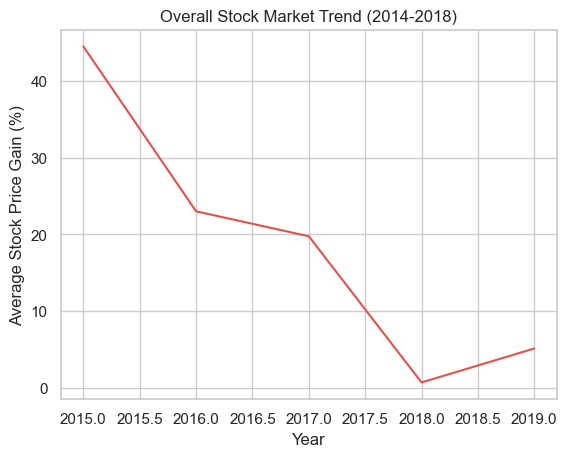

In [21]:
years = [2015, 2016, 2017, 2018, 2019]
plt.plot(years, average_price_gain)
plt.xlabel('Year')
plt.ylabel('Average Stock Price Gain (%)')
plt.title('Overall Stock Market Trend (2014-2018)')
plt.show()


In [22]:




# Group the data by 'Ticker' and calculate the mean for each group
average_data = data_cleaned.groupby('Ticker').mean()

# Reset the index to make 'Ticker' a column again
average_data.reset_index(inplace=True)

In [23]:
# Tetapkan kolom 'Ticker' sebagai indeks DataFrame
data_cleaned_numeric_average = average_data.set_index('Ticker')

In [24]:
data_cleaned_numeric_average.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, A to ZYME
Columns: 232 entries, Revenue to Class19
dtypes: float64(232)
memory usage: 6.7+ MB


In [25]:
data_cleaned_numeric_average.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,2015 PRICE VAR [%],Class15,2016 PRICE VAR [%],Class16,2017 PRICE VAR [%],Class17,2018 PRICE VAR [%],Class18,2019 PRICE VAR [%],Class19
Ticker,,,,,,,,,,,,,,,,,,,,,
A,4.334800e+09,0.04814,2.072800e+09,2.262000e+09,348200000.0,1.248800e+09,1.597000e+09,6.650000e+08,80400000.0,6.564000e+08,...,0.835849,1.0,2.638989,1.0,9.070188,1.0,0.143576,1.00,6.195220,1.00
AA,1.139300e+10,0.02115,8.997000e+09,2.396000e+09,41250000.0,3.092500e+08,1.647000e+09,7.490000e+08,184750000.0,2.732500e+08,...,0.000000,1.0,5.511610,1.0,21.713492,1.0,-12.955410,0.75,-4.506478,0.75
AAL,4.218900e+10,0.12840,1.863500e+10,2.355400e+10,0.0,1.209240e+10,1.907400e+10,4.480000e+09,973400000.0,3.451800e+09,...,-4.153620,0.8,3.080990,1.0,2.668970,1.0,-7.763587,0.80,-2.120414,0.80
AAME,1.730004e+08,0.02386,1.121842e+08,6.081620e+07,0.0,4.228860e+07,5.544040e+07,5.375800e+06,1671600.0,3.704200e+06,...,4.889023,1.0,-2.988418,0.8,-3.330868,0.8,-5.077964,0.80,-4.050121,0.80
AAN,3.259027e+09,0.11624,2.951072e+08,2.963920e+09,0.0,1.392605e+09,2.730039e+09,2.338810e+08,20584400.0,2.090054e+08,...,-5.329959,0.8,8.320884,1.0,5.062945,1.0,1.365026,1.00,6.335136,1.00


In [33]:
# Select the desired columns from the cleaned_data DataFrame
cols = ['Ticker', '2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
data_selected = data_cleaned[cols]

# Replace 0 values with NaN
data_selected.replace(0, np.nan, inplace=True)

# Group by Ticker and calculate the mean of non-NaN values for each year
mean_gains = data_selected.groupby('Ticker').mean()

# Reset the index to make 'Ticker' a column again
mean_gains.reset_index(inplace=True)



In [34]:
mean_gains.head()

,Ticker,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
0,A,4.179246,13.194947,45.350940,0.717881,30.976102
1,AA,NaN,22.046441,86.853968,-51.821641,-18.025913
2,AAL,-20.768098,15.404948,13.344850,-38.817936,-10.602069
3,AAME,24.445114,-14.942088,-16.654341,-25.389821,-20.250605
4,AAN,-26.649795,41.604419,25.314724,6.825130,31.675678


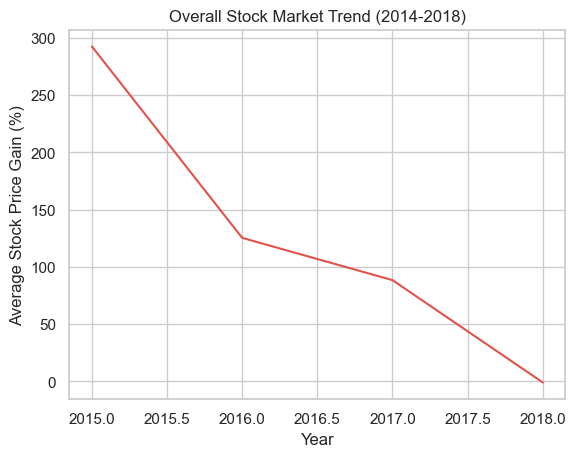

In [35]:
# Calculate the mean of the columns '2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]' for each year
year_cols = ['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]']
mean_yearly = mean_gains[year_cols].mean()

# Plot the mean yearly stock price gain
plt.plot(range(2015, 2019), mean_yearly)
plt.xlabel('Year')
plt.ylabel('Average Stock Price Gain (%)')
plt.title('Overall Stock Market Trend (2014-2018)')
plt.show()

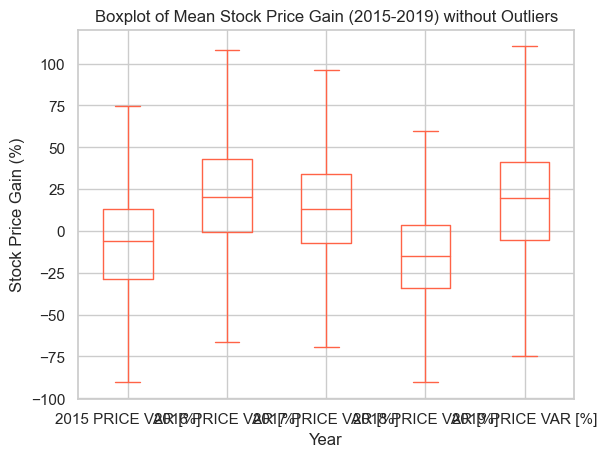

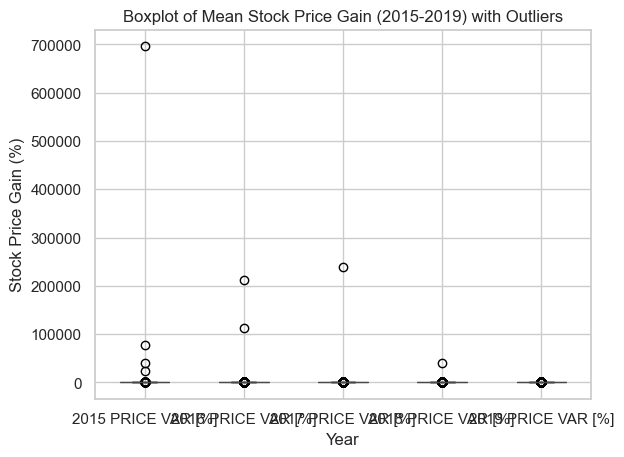

In [43]:
# Select the columns of interest
cols = ['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
data_selected = mean_gains[cols]

# Create a boxplot of the selected columns without outliers
data_selected.boxplot(showfliers=False, color='tomato')
plt.xlabel('Year')
plt.ylabel('Stock Price Gain (%)')
plt.title('Boxplot of Mean Stock Price Gain (2015-2019) without Outliers')
plt.show()

# Create a boxplot of the selected columns with outliers
data_selected.boxplot(showfliers=True)
plt.xlabel('Year')
plt.ylabel('Stock Price Gain (%)')
plt.title('Boxplot of Mean Stock Price Gain (2015-2019) with Outliers')
plt.show()


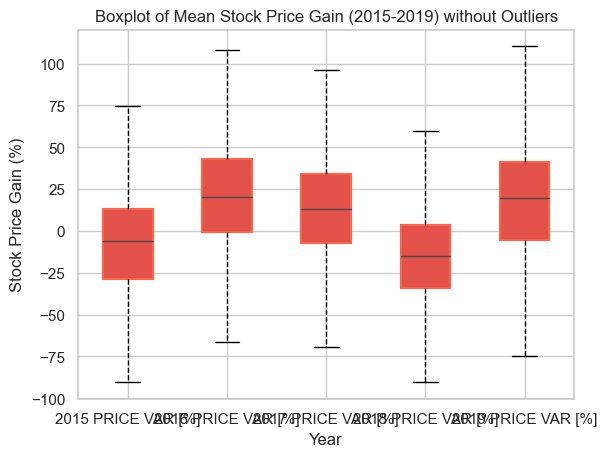

In [45]:
# Select the columns of interest
cols = ['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
data_selected = mean_gains[cols]

# Set the box and whisker colors
box_color = 'tomato'
whisker_color = 'black'

# Create a dictionary of box properties
boxprops = dict(linestyle='-', linewidth=1.5, color=box_color)

# Create a dictionary of whisker properties
whiskerprops = dict(linestyle='--', linewidth=1, color=whisker_color)

# Create the boxplot with filled boxes
ax = data_selected.boxplot(showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, patch_artist=True)

# Set the fill color for the boxes
for patch in ax.artists:
    patch.set_facecolor(box_color)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Stock Price Gain (%)')
plt.title('Boxplot of Mean Stock Price Gain (2015-2019) without Outliers')

# Show the plot
plt.show()


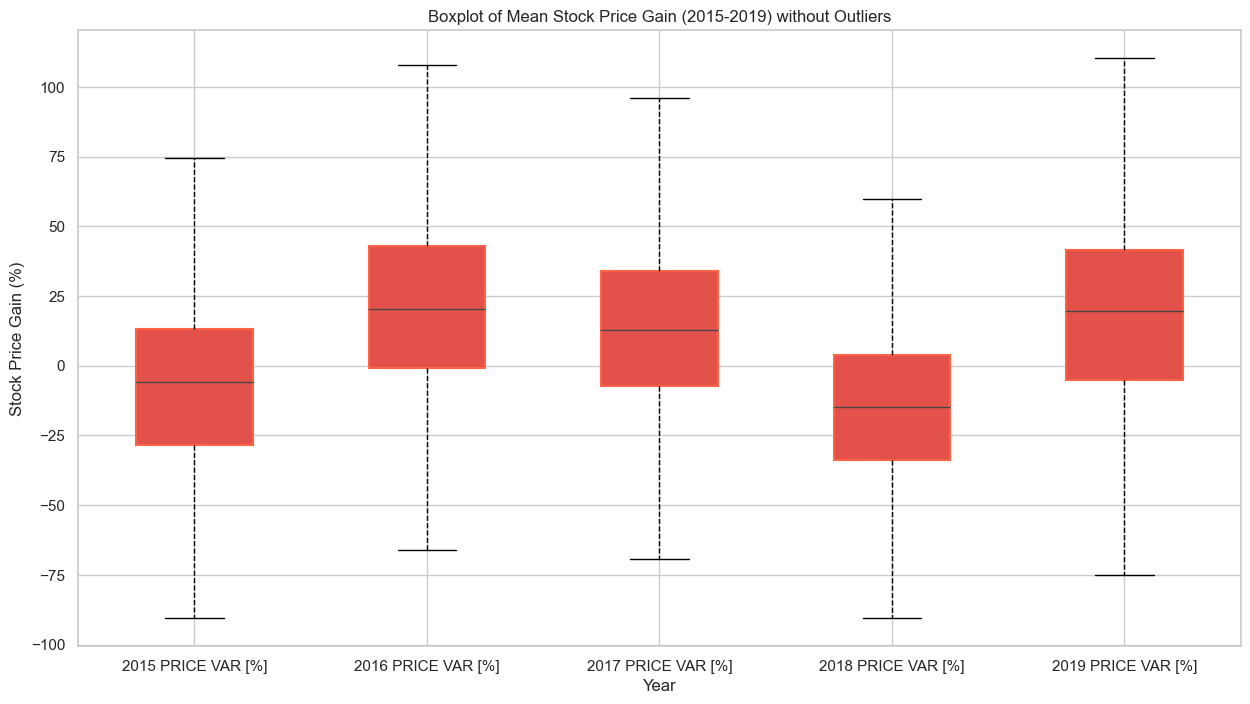

In [48]:
# Create the boxplot with filled boxes and set the size
fig, ax = plt.subplots(figsize=(15, 8))
data_selected.boxplot(showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, patch_artist=True, ax=ax)

# Set the fill color for the boxes
for patch in ax.artists:
    patch.set_facecolor(box_color)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Stock Price Gain (%)')
plt.title('Boxplot of Mean Stock Price Gain (2015-2019) without Outliers')

# Show the plot
plt.show()


In [51]:
# Calculate the mean of the selected columns for each year
mean_yearly = data_selected.describe()
mean_yearly

,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
count,2815.000000,3204.000000,3422.000000,3530.000000,3626.000000
mean,292.599081,125.305278,88.368272,-1.041505,22.001893
std,13221.663387,4256.428262,4080.568935,662.085993,58.679766
min,-100.397220,-98.153846,-99.977167,-99.999115,-98.997050
25%,-28.457915,-0.888105,-7.310635,-33.967632,-5.109065
50%,-5.967603,20.515007,12.976584,-14.695417,19.571447
75%,13.092556,42.783393,34.132025,3.734389,41.434623
max,695566.672044,212700.011623,238699.999493,39219.999109,1285.625036


correlations = data_cleaned_numeric_average.corr()
price_gain_correlations = correlations[['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']]

top_correlated_indicators = {}
for year in range(2015, 2020):
    price_var_col = f'{year} PRICE VAR [%]'
    top_correlations = price_gain_correlations[price_var_col].nlargest(11)  # 11 because the correlation with itself is included
    top_correlated_indicators[year] = top_correlations.index.tolist()
    top_correlated_indicators[year].remove(price_var_col)  # Remove the price gain column itself


# import seaborn as sns

# Combine top indicators from all years into a single set
all_top_indicators = set()
for indicators in top_correlated_indicators.values():
    all_top_indicators.update(indicators)

# Create a dataframe with only the top indicators and price gain columns
top_indicators_data = data_cleaned[all_top_indicators | {'2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]'}]

# Calculate correlations for the top indicators
top_indicators_correlations = top_indicators_data.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(top_indicators_correlations, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlations Between Top Indicators and Stock Price Gains')
plt.show()


def create_year_heatmap(year):
    price_var_col = f'{year} PRICE VAR [%]'
    top_indicators = top_correlated_indicators[year] + [price_var_col]

    # Create a dataframe with only the top indicators and price gain columns for the specific year
    year_indicators_data = data_cleaned[top_indicators]

    # Calculate correlations for the top indicators
    year_indicators_correlations = year_indicators_data.corr()

    # Visualize the correlations using a heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(year_indicators_correlations, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
    plt.title(f'Correlations Between Top Indicators and Stock Price Gains for {year}')
    plt.show()

# Create heatmaps for each year
for year in range(2015, 2020):
    create_year_heatmap(year)


top_correlated_indicators = {}
for year in range(2015, 2020):
    price_var_col = f'{year} PRICE VAR [%]'
    top_correlations = price_gain_correlations[price_var_col].nlargest(11)  # 11 because the correlation with itself is included
    top_correlations = top_correlations.drop(price_var_col)  # Remove the price gain column itself
    top_correlated_indicators[year] = top_correlations

# Print the top correlated indicators for each year
for year, indicators in top_correlated_indicators.items():
    print(f'Top 10 correlated indicators for {year}:')
    print(indicators)
    print('\n')


# Count the unique values of 'Class' column in each dataframe
count_2014 = average_data['Class15'].value_counts()
count_2015 = average_data['Class16'].value_counts()
count_2016 = average_data['Class17'].value_counts()
count_2017 = average_data['Class18'].value_counts()
count_2018 = average_data['Class19'].value_counts()

# Display the counts for each dataframe
print("2014 Financial Data:\n", count_2014)
print("2015 Financial Data:\n", count_2015)
print("2016 Financial Data:\n", count_2016)
print("2017 Financial Data:\n", count_2017)
print("2018 Financial Data:\n", count_2018)

Clean ulang Class

# Define a function to set the class value based on the stock price gain
def set_class(value):
    if value >= 0:
        return 1
    else:
        return 0

# Iterate through the years and create new class columns
for year in range(2015, 2020):
    price_var_col = f'{year} PRICE VAR [%]'
    class_col = f'Class{year % 2000}'

    # Apply the set_class function to each value in the price_var_col
    average_data[class_col] = average_data[price_var_col].apply(set_class)

# Rearrange columns to put the class columns next to the corresponding price var columns
new_column_order = []
for year in range(2015, 2020):
    new_column_order.append(f'{year} PRICE VAR [%]')
    new_column_order.append(f'Class{year % 2000}')

remaining_columns = [col for col in average_data.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

average_data = average_data[new_column_order]

In [ ]:
average_data.head(20)

# Get the current column order
current_column_order = average_data.columns.tolist()

# Create a list of the 'PRICE VAR [%]' and 'Class' columns to move
columns_to_move = []
for year in range(2015, 2020):
    columns_to_move.append(f'{year} PRICE VAR [%]')
    columns_to_move.append(f'Class{year % 2000}')

# Remove the 'PRICE VAR [%]' and 'Class' columns from the current column order
remaining_columns = [col for col in current_column_order if col not in columns_to_move]

# Create a new column order with the 'PRICE VAR [%]' and 'Class' columns at the rightmost side
new_column_order = remaining_columns + columns_to_move

# Reorder the DataFrame columns based on the new column order
average_data = average_data[new_column_order]

data_selected = data5

# Replace 0 values with NaN
data_selected.replace(0, np.nan, inplace=True)

# Group by Ticker and calculate the mean of non-NaN values for each year
average_data_sector = data_selected.groupby('Ticker').mean()

# Reset the index to make 'Ticker' a column again
average_data_sector.reset_index(inplace=True)

data5.info()

data_cleaned.info()